In [1]:
from requests import post,get
import base64
import os
import json

In [2]:
CLIENT_ID = '92c7e8974c32468bb7f8fdba1d898847'
SECRET_ID = 'a23b031188f34caca5c97bc7851c2192'



In [3]:
def get_token_access():
    auth_string = f"{CLIENT_ID}:{SECRET_ID}"
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")

    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": f"Basic {auth_base64}",
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {"grant_type": "client_credentials"}
    result = requests.post(url, headers=headers, data=data)
    json_result = json.loads(result.content)
    token = json_result["access_token"]
    return token

In [4]:
#API SEARCH
import requests
import json

def search_artist(token, artist_name):
    url = "https://api.spotify.com/v1/search"
    headers = {
        "Authorization": f"Bearer {token}"
    }
    params = {
        "q": artist_name,
        "type": "artist",
        "limit": 1
    }
    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        #utilizziamo json in modo che i dati possono essere facilmente manipolati e utilizzati 
        data = json.loads(response.content)["artists"]["items"]
        return data[0]
    else:
        print(f"Errore nella richiesta HTTP: {response.status_code}")
        return None  

In [90]:
access_token = get_token_access()
result = search_artist(access_token, "Calcutta")
print(result)

{'external_urls': {'spotify': 'https://open.spotify.com/artist/582KhTHEVOONNQLmQ5612r'}, 'followers': {'href': None, 'total': 661374}, 'genres': ['italian adult pop', 'italian pop', 'rome indie'], 'href': 'https://api.spotify.com/v1/artists/582KhTHEVOONNQLmQ5612r', 'id': '582KhTHEVOONNQLmQ5612r', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5ebe6f42fb00b849720936df798', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174e6f42fb00b849720936df798', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f178e6f42fb00b849720936df798', 'width': 160}], 'name': 'Calcutta ', 'popularity': 67, 'type': 'artist', 'uri': 'spotify:artist:582KhTHEVOONNQLmQ5612r'}


In [6]:
#estraggo le informazioni inerenti al nome, id , url, genere ,follower e immagine della nostra ricerca

artist_name = result["name"]
artist_id = result["id"] #spotify id for the artist
artist_url = result["external_urls"]["spotify"] #the spotify url for the object 
artist_genres = result["genres"]
artist_followers = result["followers"]["total"]
artist_image = result["images"][0]["url"]

In [7]:
import pandas as pd
from IPython.display import Image, display, HTML

#creo un dizionario
artist_data = {
    "NAME": [artist_name],
    "ID": [artist_id],
    "SPOTIFY URL": [artist_url],
    "GENERE": [artist_genres],
    "FOLLOWER": [artist_followers],
    "artist_image_url": [artist_image]
}
#permette di visualizzare il contenuto delle colonne senza troncarle in caso di tot lunghezza
pd.set_option('display.max_colwidth', None)
df = pd.DataFrame(artist_data)

image_width = 250
# Visualizza l'immagine cnetrata
image_html = f'<div style="display: flex; justify-content: center;">' \
             f'<img src="{df["artist_image_url"][0]}" alt="Artista" width="{image_width}" style="display: block;"/>' \
             f'</div>'
display(HTML(image_html))

#df drop rimuove la collone artist_image_url e visualizza il dataframe
display(df.drop("artist_image_url", axis=1))

,NAME,ID,SPOTIFY URL,GENERE,FOLLOWER
0,Calcutta,582KhTHEVOONNQLmQ5612r,https://open.spotify.com/artist/582KhTHEVOONNQLmQ5612r,"[italian adult pop, italian pop, rome indie]",661374


In [8]:
#TRACK PIU FAMOSE DI QUEST'ARTISTA

def top_tracks_artist(token, artist_id):
    url=f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks?country=IT"
    headers = {
        "Authorization": f"Bearer {token}"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        #utilizziamo json in modo che i dati possono essere facilmente manipolati e utilizzati 
        data = json.loads(response.content)["tracks"]
        return data
    else:
        print(f"Errore nella richiesta HTTP: {response.status_code}")
        return None  


In [9]:
res = top_tracks_artist(access_token, artist_id)
res

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/582KhTHEVOONNQLmQ5612r'},
     'href': 'https://api.spotify.com/v1/artists/582KhTHEVOONNQLmQ5612r',
     'id': '582KhTHEVOONNQLmQ5612r',
     'name': 'Calcutta ',
     'type': 'artist',
     'uri': 'spotify:artist:582KhTHEVOONNQLmQ5612r'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/4fPV5OWBxzBVaYRbXduGtj'},
   'href': 'https://api.spotify.com/v1/albums/4fPV5OWBxzBVaYRbXduGtj',
   'id': '4fPV5OWBxzBVaYRbXduGtj',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b2738acaa7da2fb43a4038d962c6',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn.co/image/ab67616d00001e028acaa7da2fb43a4038d962c6',
     'width': 300},
    {'height': 64,
     'url': 'https://i.scdn.co/image/ab67616d000048518acaa7da2fb43a4038d962c6',
     'width': 64}],
   'is_playable': True,
   'name': 'RELAX',
   'release_date': '2023-10-20',
   '

In [10]:
#alcuni dati inerenti ad una singola canzone
artist_uri= res[0]["uri"]
preview_track = res[0]["preview_url"]
number_track = res[0]["track_number"]
popularity_track = res[0]["popularity"]
name_track = res[0]["name"]
link = res[0]["external_urls"]["spotify"]
id_track = res[0]["id"]
duration_ms = res[0]['duration_ms']

print(res[0]["album"]["name"])
print(res[0]["album"]["images"][0]["url"])
print(res[0]["album"]["total_tracks"])

RELAX
https://i.scdn.co/image/ab67616d0000b2738acaa7da2fb43a4038d962c6
11


In [11]:
#andiamo a visualizzare corettamente la playlist

df = pd.DataFrame([{
    'Titolo': song['name'],
    #ci sono 60000 ms in un minuto con la divisione andiamo a prendere i minuti, dopodiche prendiamo il resto dei ms
    #dividendo per 1000 otteniamo i secondi e prendiamo solo le prime due cifre intere
    'Durata': f"{song['duration_ms'] // 60000}:{(song['duration_ms'] % 60000) // 1000:02d}",
    'Nome Album' : song["album"]["name"],
    'Song URL': song['external_urls']['spotify']
} for song in res])


#miglioriamo lo stile di visualizzazione del dataframe
styled_df = df.style.set_properties(**{'text-align': 'left'})\
            .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}])\
            .format({'Song URL': '<a href="{}">Listen here</a>'}) #formattazione url come pulsante da cliccare

display(styled_df)


,Titolo,Durata,Nome Album,Song URL
0,2minuti,3:34,RELAX,Listen here
1,Tutti,4:10,RELAX,Listen here
2,Giro con te,3:24,RELAX,Listen here
3,Controtempo,3:44,RELAX,Listen here
4,Cosa mi manchi a fare,2:49,Mainstream (Deluxe Edition),Listen here
5,Oroscopo (feat. Takagi & Ketra) - Ghost track,3:18,Mainstream +,Listen here
6,Loneliness,2:39,RELAX,Listen here
7,SSD,4:23,RELAX,Listen here
8,Preoccuparmi,3:38,RELAX,Listen here
9,Ghiaccioli,3:07,RELAX,Listen here


In [12]:
#PRENDE TUTTI GLI ALBUM FATTI DA UN ARTISTA
def get_artist_album(token, id):
    url=f"https://api.spotify.com/v1/artists/{id}/albums"
    headers = {
        "Authorization": f"Bearer {token}"
    }
    params = {
        "market" : "IT",
        "limit": 10
    }
    response = requests.get(url, headers=headers, params= params)
    if response.status_code == 200:
        #utilizziamo json in modo che i dati possono essere facilmente manipolati e utilizzati 
        data = json.loads(response.content)["items"]
        return data
    else:
        print(f"Errore nella richiesta HTTP: {response.status_code}")
        return None  


In [13]:
res = get_artist_album(access_token, artist_id)
res

[{'album_group': 'album',
  'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/582KhTHEVOONNQLmQ5612r'},
    'href': 'https://api.spotify.com/v1/artists/582KhTHEVOONNQLmQ5612r',
    'id': '582KhTHEVOONNQLmQ5612r',
    'name': 'Calcutta ',
    'type': 'artist',
    'uri': 'spotify:artist:582KhTHEVOONNQLmQ5612r'}],
  'external_urls': {'spotify': 'https://open.spotify.com/album/4fPV5OWBxzBVaYRbXduGtj'},
  'href': 'https://api.spotify.com/v1/albums/4fPV5OWBxzBVaYRbXduGtj',
  'id': '4fPV5OWBxzBVaYRbXduGtj',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2738acaa7da2fb43a4038d962c6',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e028acaa7da2fb43a4038d962c6',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048518acaa7da2fb43a4038d962c6',
    'width': 64}],
  'is_playable': True,
  'name': 'RELAX',
  'release_date': '2023-10-20',
  'releas

In [14]:
df = pd.DataFrame([{
    'image' : album["images"][0]["url"],
    'Nome Album': album['name'],
    'Data di uscita': album['release_date'],
    'Numero di canzoni' : album["total_tracks"],
    'Album url': album['external_urls']['spotify']
} for album in res])

df['Immagine'] = df['image'].apply(lambda x: f'<img src="{x}" alt="Album Cover" style="max-height: 50px; max-width: 50px;">')

# Seleziona solo le colonne desiderate
selected_columns = ['Immagine','Nome Album', 'Data di uscita', 'Numero di canzoni', 'Album url']
df_selected = df[selected_columns]
df_selected = df_selected[df_selected['Numero di canzoni'] != 1] #eliminiamo playlist che hanno solo una canzone
 
# Visualizza il DataFrame con le immagini
display(HTML(df_selected.to_html(escape=False)))

,Immagine,Nome Album,Data di uscita,Numero di canzoni,Album url
0,,RELAX,2023-10-20,11,https://open.spotify.com/album/4fPV5OWBxzBVaYRbXduGtj
1,,Evergreen,2018-05-25,10,https://open.spotify.com/album/0w267xHWJikkEIcQgfhezx
2,,Mainstream +,2017-02-24,30,https://open.spotify.com/album/1ydmsbKjOxrWFBQmoz1O91
3,,Mainstream (Deluxe Edition),2016-06-03,11,https://open.spotify.com/album/11dh7pT3FRrGkI3TXl0e4k


In [15]:
def get_artist_related(token, id):
    url=f"https://api.spotify.com/v1/artists/{id}/related-artists"
    headers = {
        "Authorization": f"Bearer {token}"
    }
 
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        #utilizziamo json in modo che i dati possono essere facilmente manipolati e utilizzati 
        data = json.loads(response.content)["artists"]
        return data
    else:
        print(f"Errore nella richiesta HTTP: {response.status_code}")
        return None  

In [16]:
results = get_artist_related(access_token, artist_id)


df = pd.DataFrame([{
    'name' : result["name"],
    'followers' : result["followers"]["total"],
     'image' : f'<img src="{result["images"][0]["url"]}" width="40" height="40">'
} for result in results])



df = df.sort_values(by='followers',ascending=False)
#reset degli indici
df= df.reset_index(drop=True)

display(HTML(df.to_html(escape=False)))


,name,followers,image
0,Coez,2086588,
1,Carl Brave,787561,
2,Gazzelle,781142,
3,Frah Quintale,624854,
4,Carl Brave x Franco126,576899,
5,Franco126,340960,
6,Brunori Sas,308565,
7,Lo Stato Sociale,281582,
8,Willie Peyote,251507,
9,Coma_Cose,220636,


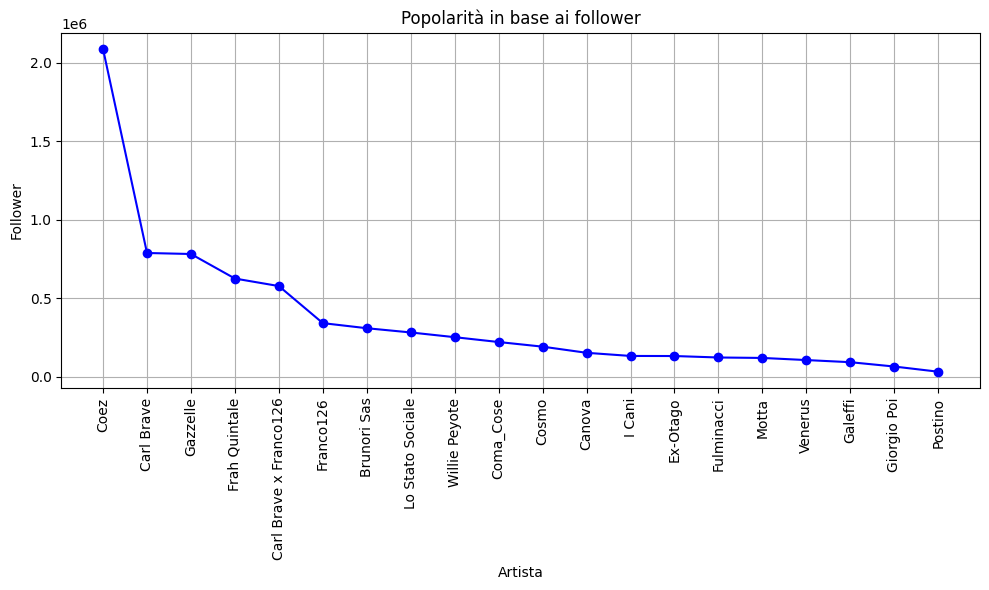

In [17]:
import matplotlib.pyplot as plt

# Creare una lista dei nomi e una lista dei follower dai dati
names = df['name'].tolist()
followers = df['followers'].tolist()

plt.figure(figsize=(10, 6))
plt.plot(names, followers, marker='o', color='blue', linestyle='-')
plt.title('Popolarità in base ai follower')
plt.xlabel('Artista')
plt.ylabel('Follower')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()

In [18]:
def get_genres(token):
    url ="https://api.spotify.com/v1/recommendations/available-genre-seeds"
    headers = {
        "Authorization": f"Bearer {token}"
    }

    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        #utilizziamo json in modo che i dati possono essere facilmente manipolati e utilizzati 
        data = json.loads(response.content)["genres"]
        return data
    else:
        print(f"Errore nella richiesta HTTP: {response.status_code}")
        return None  

In [19]:
res=get_genres(access_token)
res

['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'bossanova',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'holidays',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie',
 'indie-pop',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metal-misc',
 'metalcore',
 'minimal-techno',
 'movies',
 'mpb',
 'new-age',
 'new-release',
 'opera',
 'pagode',

In [141]:
import requests
import urllib.parse
import secrets
from datetime import datetime
import json



REDIRECT_URI = "http://localhost:5000/callback"
TOKEN_URL = "https://accounts.spotify.com/api/token"
AUTH_URL = "https://accounts.spotify.com/authorize"
API_BASE_URL = "https://api.spotify.com/v1/"

state = secrets.token_urlsafe(16) 

scope = 'user-read-private user-top-read user-read-email user-follow-read playlist-modify-private playlist-modify-public user-follow-modify user-library-read'
params = {
    'client_id': CLIENT_ID,
    'response_type': 'code',
    'scope': scope,
    'redirect_uri': REDIRECT_URI,
    'show_dialog': True,
    'state': state
}

auth_url = f"{AUTH_URL}?{urllib.parse.urlencode(params)}"
print(f'Vai a questa URL e autorizza l\'app: {auth_url}')
callback_url = input("Incolla l'URL della pagina qui: ")
url_components = urllib.parse.urlparse(callback_url)
query_params = urllib.parse.parse_qs(url_components.query)
authorization_code = query_params.get('code')

req_body = {
    'code': authorization_code,
    'grant_type': 'authorization_code',
    'redirect_uri': REDIRECT_URI,
    'client_id': CLIENT_ID,
    'client_secret': SECRET_ID
}

response = requests.post(TOKEN_URL, data=req_body)
token_info = response.json()
access_token = token_info.get('access_token')
refresh_token = token_info.get('refresh_token')
expires_at = datetime.now().timestamp() + token_info.get('expires_in', 3600)

headers = {
    'Authorization': f'Bearer {access_token}'
}

Vai a questa URL e autorizza l'app: https://accounts.spotify.com/authorize?client_id=92c7e8974c32468bb7f8fdba1d898847&response_type=code&scope=user-read-private+user-top-read+user-read-email+user-follow-read+playlist-modify-private+playlist-modify-public+user-follow-modify+user-library-read&redirect_uri=http%3A%2F%2Flocalhost%3A5000%2Fcallback&show_dialog=True&state=I3axKfQI6HORwl5euIoL5Q


Incolla l'URL della pagina qui:  http://localhost:5000/callback?code=AQCif7TS9-8iSPfgxwwUF1kSzq9SdEUpx-3qf-vSLr_48BHcGciYL_1MeEmR8YI1w6xFJXni8JjKs6ArGQLMF3Pp4VzfsWp4vMlK8ziR0MNVdw1OPH9Nml1Bq1zi0TwhcZa_4zAnRN2Wqt2RvUVd7xyC6etwJtG9JyZBS46TGUPdrGjpPB1D4IDVGoQB-e9uz2785THKkFqOtx_-8fbWFIIJAVSrbnmTkHttSL2aOefrW_lxtTTDgarx6bpxefCNKsHCDNQ8csnt6NEH4GD0j0uF-zeMyFtN5LxPdYbWqmaqW69-3veSiTV_uLhzzu9WMoCuR758c9iclDiFGingE_zPWq5nMyCFJoc6ZcLpH5Qigab5PgFFhdZpxRNC550&state=I3axKfQI6HORwl5euIoL5Q


In [142]:
print(token_info)
#Get detailed profile information about the current user (including the current user's username).
def get_current_user_profile(): 
    response = requests.get(API_BASE_URL + 'me', headers=headers)
    current_inf = response.json()
    return current_inf

output = get_current_user_profile()
print(json.dumps(output, indent=2))

{'access_token': 'BQCBU50wW2NWycEeIathE9wTX3LqQRcB65qQl8eBQQT8as8plfCYIf13RmCrLYspYZPcWKCmCGlymWQ8jc44UhqKVzz5weli6xBPYrdx5QoCTLzhJXwuz6QO-eTp90S_AjYvcjcGBtdkGhpCBgGJ83xx59-wtMfVJ59cpT-4ZKvIHfq2lKZxnz7sQOOA1in8StJv7vmhybb4G3p3MwoXI4X5QZQrHxDlXQOnW2hEcp424OYC0Oubh1t5wwlJZmm404JbAJrGhdSu9B48MA', 'token_type': 'Bearer', 'expires_in': 3600, 'refresh_token': 'AQDdtv_YcHNfNrDwwL3ZUY5okMriMcvOZSqvAmLGAsHqlKqmHMLnA1bgx1q6Om7cNfI_HjGlqxHUNrb4kKmcn4Xmy7KSnFdSRm0pKdG6JFNQVsNqWcHFjk_pQgvLSX-2v3s', 'scope': 'user-follow-modify user-library-read user-follow-read playlist-modify-private playlist-modify-public user-read-email user-read-private user-top-read'}
{
  "display_name": "tristano167",
  "external_urls": {
    "spotify": "https://open.spotify.com/user/tristano167"
  },
  "href": "https://api.spotify.com/v1/users/tristano167",
  "id": "tristano167",
  "images": [],
  "type": "user",
  "uri": "spotify:user:tristano167",
  "followers": {
    "href": null,
    "total": 0
  },
  "country": "IT",
  

In [35]:
#Get the current user's top artists or tracks based on calculated affinity.
def get_user_top_items(type):
    #https://api.spotify.com/v1/me/top/{type}
    response = requests.get(API_BASE_URL + f"me/top/{type}", headers=headers)
    current_inf = response.json()
    return current_inf
                            #replace with tracks or artists
output = get_user_top_items("artists")
print(json.dumps(output, indent=2))

{
  "items": [
    {
      "external_urls": {
        "spotify": "https://open.spotify.com/artist/582KhTHEVOONNQLmQ5612r"
      },
      "followers": {
        "href": null,
        "total": 0
      },
      "genres": [
        "italian adult pop",
        "italian pop",
        "rome indie"
      ],
      "href": "https://api.spotify.com/v1/artists/582KhTHEVOONNQLmQ5612r",
      "id": "582KhTHEVOONNQLmQ5612r",
      "images": [
        {
          "height": 640,
          "url": "https://i.scdn.co/image/ab6761610000e5ebe6f42fb00b849720936df798",
          "width": 640
        },
        {
          "height": 320,
          "url": "https://i.scdn.co/image/ab67616100005174e6f42fb00b849720936df798",
          "width": 320
        },
        {
          "height": 160,
          "url": "https://i.scdn.co/image/ab6761610000f178e6f42fb00b849720936df798",
          "width": 160
        }
      ],
      "name": "Calcutta ",
      "popularity": 67,
      "type": "artist",
      "uri": "spotify:

In [45]:
#Get public profile information about a Spotify user.
def get_user_public_information(user_name):
    #https://api.spotify.com/v1/me/top/{type}
    response = requests.get(API_BASE_URL + f"users/{user_id}", headers=headers)
    current_inf = response.json()
    return current_inf
output = get_user_public_information("tristano167") 
print(json.dumps(output, indent=1))


{
 "display_name": "tristano167",
 "external_urls": {
  "spotify": "https://open.spotify.com/user/tristano167"
 },
 "href": "https://api.spotify.com/v1/users/tristano167",
 "id": "tristano167",
 "images": [],
 "type": "user",
 "uri": "spotify:user:tristano167",
 "followers": {
  "href": null,
  "total": 0
 }
}


In [133]:
#Add the current user as a follower of a playlist

def follow_playlist(playlist_id):
    response = requests.put(API_BASE_URL + f"playlists/{playlist_id}/followers", headers=headers)
    return response
                        #id about a spotify playlist used for api test
output = follow_playlist("3cEYpjA9oz9GiPac4AsH4n") 
if output:
    print("success")
else:
    print("operation failed")


success


In [62]:
#Get the current user's followed artists.
def unfollow_playlist(playlist_id):
    response = requests.delete(API_BASE_URL + f"playlists/{playlist_id}/followers", headers=headers)
    return response

output = follow_playlist("3cEYpjA9oz9GiPac4AsH4n") 
if output:
    print("success")
else:
    print("operation failed")

success


In [88]:
#Get the current user's followed artists.
def get_followed_artists():
    params = {
        'type' : "artist" 
        #is required by documentation
    }
    response = requests.get(API_BASE_URL + f"me/following", headers=headers, params=params)
    current_inf = response.json()["artists"]["items"]
    return current_inf
    
output = get_followed_artists() 
#print(json.dumps(output, indent=2))
#gonna extract followed's name
for out in output:
    print(out["name"], "genres: " , out["genres"])


Olivia Rodrigo genres:  ['pop']
Imagine Dragons genres:  ['modern rock', 'pop', 'rock']
Calcutta  genres:  ['italian adult pop', 'italian pop', 'rome indie']
Frah Quintale genres:  ['italian hip hop', 'italian indie pop', 'italian pop', 'milan indie']


In [116]:
#Follow Artists or Users
#Add the current user as a follower of one or more artists or other Spotify users.

def follow_an_artist():
    #type = "arist" - "user"
    #ids -> a list of the artist or the user spotify ids
    #gonna follow arctick monkeys
    ids = search_artist(access_token, "arctic monkeys")
    ids = ids['id']
    params = {
        'type' : "artist",
         'ids' :  ids
    }
    response = requests.put(API_BASE_URL + "me/following", headers=headers, params=params)

    if response.status_code == 204:
        print("artist or user followed")
    else :
        print("bad request / token ")

follow_an_artist()


artist or user followed


In [119]:
#Remove the current user as a follower of one or more artists or other Spotify users.
def unfollow_an_artist():
    #type = "arist" - "user"
    #ids -> a list of the artist or the user spotify ids
    #gonna unfollow arctick monkeys
    ids = search_artist(access_token, "arctic monkeys")
    ids = ids['id']
    params = {
        'type' : "artist",
         'ids' :  ids
    }
    response = requests.delete(API_BASE_URL + "me/following", headers=headers, params=params)

    if response.status_code == 204: #nella documentazione c'è scritto 200 ma è errata! 
        print("artist or user unfollowed")
    else :
        print("bad request / token ")

unfollow_an_artist()


artist or user unfollowed


In [127]:
#Check to see if the current user is following one or more artists or other Spotify users.

def check_if_follow_artist():
    #type = "arist" - "user"
    #ids -> a list of the artist or the user spotify ids
    #gonna follow arctick monkeys
    ids = search_artist(access_token, "calcutta")
    ids = ids['id']
    params = {
        'type' : "artist",
         'ids' :  ids
    }
    response = requests.get(API_BASE_URL + "me/following/contains", headers=headers, params=params)
    return response.json()
    
output = check_if_follow_artist()
print(output)

[True]


In [143]:
#Check to see if one or more Spotify users are following a specified playlist.

def check_if_users_follow_playlist(playlist_id):    
    params = {
         'ids' : "tristano167"
    }
    response = requests.get(API_BASE_URL + f"playlists/{playlist_id}/followers/contains", headers=headers, params=params)
    return response.json()
    
output = check_if_users_follow_playlist("3cEYpjA9oz9GiPac4AsH4n")
print(output)

[False]


In [166]:
#Get a list of the songs saved in the current Spotify user's 'Your Music' library.

def get_user_saved_tracks():
    response = requests.get(API_BASE_URL + f"me/tracks", headers=headers)
    return response.json()['items']

output = get_user_saved_tracks()
for out in output:
    #u can also take image - url  etc
    print(out['track']['artists'][0]['name'], "  ", out['track']['name'])

Luchè    Quelli Di Ieri
The Neighbourhood    Leaving Tonight
Two Door Cinema Club    What You Know
Twenty One Pilots    Tear in My Heart
Twenty One Pilots    Stressed Out
R.E.M.    Low
98º    True To Your Heart - From "Mulan"/Soundtrack Version
Gvngdrogv    Diventare H
Deep Purple    Smoke On The Water - Remastered 2012
Achille Lauro    Rolls Royce (feat. Boss Doms & Frenetik&Orang3)
Salmo    SPARARE ALLA LUNA (feat. Coez)
Black Sabbath    Iron Man - 2012 - Remaster
Drake    God's Plan
Typhillosion    Naruto Theme Song


In [177]:
#Get User's Saved Albums
#Get a list of the albums saved in the current Spotify user's 'Your Music' library.

def get_user_saved_album():
    response = requests.get(API_BASE_URL + f"me/albums", headers=headers)
    return response.json()['items']

output = get_user_saved_album()
for out in output:
    #u can also take image - url  etc
    print(out['album']['artists'][0]['name'], "  ", out['album']['name'])


Calcutta     RELAX


In [195]:
#Get New Releases

#Get a list of new album releases featured in Spotify (shown, for example, on a Spotify player’s “Browse” tab).

def get_new_releases():
    params = {
        'country' : "IT"
    }
    response = requests.get(API_BASE_URL + "browse/new-releases", headers=headers, params= params)
    return response.json()['albums']['items']

output = get_new_releases()
for out in output:
    print(out['name'] , " by " , out['artists'][0]['name'])


Hackney Diamonds  by  The Rolling Stones
ONE MORE TIME...  by  blink-182
TRAPHOUSE  by  Slings
Summertime Friends  by  The Chainsmokers
Constellations  by  Jazzy
LANGUORE  by  Ibisco
Breath of Fresh Air  by  Gucci Mane
Lahai  by  Sampha
RAW  by  City Girls
Sitcom triste  by  Sami River
RELAX  by  Calcutta 
Maledetta Quella Notte  by  Il Mago Del Gelato
IMPORTED  by  Santa Chiara
Limine  by  Macadamia
Selva  by  Marta Del Grandi
When Will We Land?  by  Barry Can't Swim
nadie sabe lo que va a pasar mañana  by  Bad Bunny
SOUVENIR  by  Emma
MEDUZA  by  MEDUZA
the rest  by  boygenius
